In [60]:
from scipy.optimize import curve_fit
from pyestimate import sin_param_estimate
from numpy import linspace, arange, exp, sin, cos, pi
from numpy.random import normal
import matplotlib.pyplot as plt

In [12]:
# function whose curve you're fitting to data must be given
def f(x, a, b, c):
    return a * exp(-b * x) + c

In [13]:
# generate some data
x_data = linspace(0, 4, 50)
y_data = f(x_data, 2.5, 1.3, 0.5) + 0.2 * normal(size=len(x_data))

In [14]:
popt, pcov = curve_fit(f, x_data, y_data)

In [7]:
# popt : array
#    Optimal values for the parameters so that the sum of the squared
#    residuals of ``f(xdata, *popt) - ydata`` is minimized
popt

array([2.4638375 , 1.23524694, 0.48250863])

In [8]:
pcov

array([[ 0.01212661,  0.0045733 , -0.00077808],
       [ 0.0045733 ,  0.01525048,  0.00483538],
       [-0.00077808,  0.00483538,  0.00271086]])

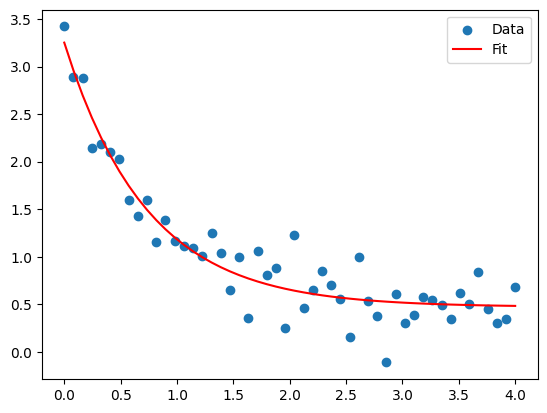

In [15]:
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, f(x_data, *popt), 'r-', label='Fit')
plt.legend()
plt.show()

In [84]:
# Define the sine function (your guess)
def f(x, amplitude, frequency, phase, offset):
    return amplitude * sin(frequency * x + phase) + offset

In [85]:
# generate some data
x = np.linspace(0, 10, 100)
orig_sin_w_y = 2.5 * sin(1.5 * x)
y = orig_sin_w_y + normal(size=x.size) # add noise

In [86]:
# initial guess for the parameters
p0 = [2.0, 1.0, 0.0, 0.0]

In [87]:
# perform the curve fitting
popt, pcov = curve_fit(f, x, y, p0=p0)
# Extract the fitted parameters
amplitude_fit, frequency_fit, phase_fit, offset_fit = popt

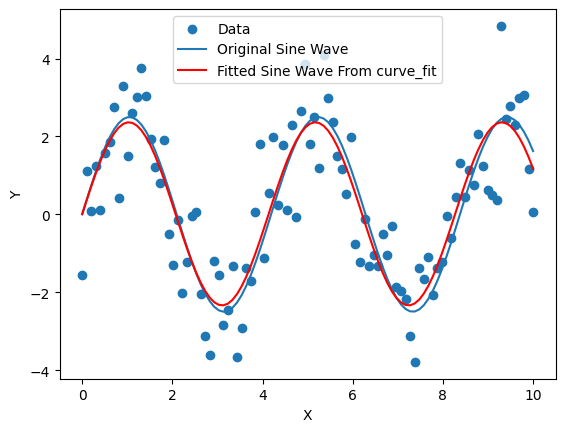

In [88]:
# Plot the original data
plt.scatter(x, y, label='Data')

plt.plot(x, orig_sin_w_y, '-', label='Original Sine Wave')
# Plot the fitted sine wave
plt.plot(x, f(x, *popt), 'r', label='Fitted Sine Wave From curve_fit')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [89]:
# using pyestimate
# generate data
n = arange(100)
orig_sine_w = 1.234 * cos(2 * pi * 0.0345 * n + pi / 7)
x = orig_sine_w + normal(scale=0.5, size=len(n))

In [90]:
# Fit the sine wave
A, f, phi = sin_param_estimate(x)

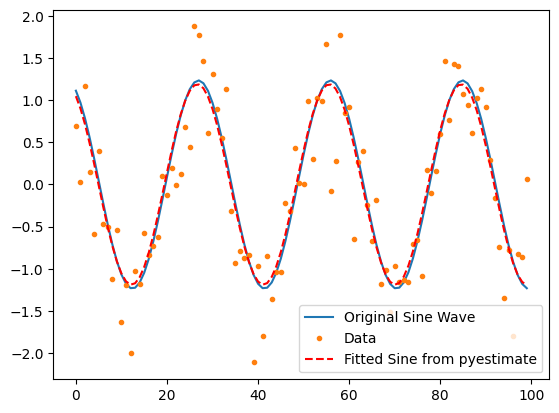

In [91]:
# Plot the results
plt.plot(orig_sine_w, '-', label='Original Sine Wave')
plt.plot(x, '.', label='Data')
plt.plot(A * np.cos(2 * pi * f * n + phi), 'r--', label='Fitted Sine from pyestimate')
plt.legend()
plt.show()